# Demonestic and Inbouned 

## Libraries 

In [86]:
import pandas as pd

from darts import TimeSeries

from darts.metrics import mape
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt

## domenstic data 

In [87]:
# domenstic data 
## read data file
df_d = pd.read_excel('raw_data/D_data.xlsx')

## crete date column and set it as index then drop the (yeaer month) columns
df_d['Date'] = pd.to_datetime(df_d['Year'].astype(str) + ' ' + df_d['Month'])
df_d.set_index('Date', inplace=True)
df_d.drop(columns=['Year', 'Month'], inplace=True)
df_d = df_d.dropna()

## rename the column
df_d.rename(columns={'Tourists Number Overnight Visitors': 'number of visitor'}, inplace=True)

/tmp/ipykernel_3440/3934125829.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_d['Date'] = pd.to_datetime(df_d['Year'].astype(str) + ' ' + df_d['Month'])


In [88]:
visitor_num_d = pd.DataFrame(df_d['number of visitor'])
spend_d = pd.DataFrame(df_d['Tourists Spending'])
# spend_d

visitor_num_d.mean()
df_d

,number of visitor,Overnight Stay,Tourists Spending,Average Length of Stay,Avergae Spending per Trip,Average Spending per Night,Religious,Leisure,Business,Visiting Friends and Relatives,...,Apartments,Private,Other,ACCOMMODATION SPEND in MILLION SAR,ENTERTAINMENT SPEND in MILLION SAR,FOOD SPENDS in MILLION SAR,LOCAL TRANSPORT SPENDS in MILLION SAR,SHOPPING SPEND in MILLION SAR,OTHER SPEND in MILLION SAR,TOTAL SPENDS in MILLION SAR
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,4823.334549,23103.710191,4381.208200,4.789987,908.335956,189.632235,1194.967621,1854.266758,169.023621,1380.924648,...,1549.630667,1335.232156,93.080369,1362.000000,399.000000,935.000000,618.000000,1005.000000,62.000000,4381.000000
2015-02-01,4140.102538,20036.521049,3581.202822,4.839620,865.003412,178.733764,952.743784,1620.487517,165.280324,1185.084843,...,1495.705370,1139.172444,137.152216,1059.000000,371.000000,784.000000,513.000000,734.000000,119.000000,3581.000000
2015-03-01,3859.551814,18428.539996,3405.944481,4.774788,882.471501,184.819008,934.119103,1674.931990,178.188045,851.654513,...,1607.740641,861.592916,126.839058,1010.000000,359.000000,754.000000,476.000000,713.000000,94.000000,3406.000000
2015-04-01,3539.225495,15996.654930,3317.223238,4.519818,937.273775,207.369807,674.581187,1592.922992,202.923651,895.586948,...,2217.786467,860.645616,8.295148,785.000000,373.000000,686.000000,458.000000,852.000000,162.000000,3317.000000
2015-05-01,3332.502920,15393.351631,3450.324841,4.619156,1035.355384,224.143833,726.238191,1410.867067,201.985253,768.996769,...,2111.083467,644.062810,18.217357,856.000000,328.000000,652.000000,489.000000,857.000000,269.000000,3450.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,7376.762000,38723.892000,9700.795968,5.249443,1315.050000,250.510000,904.147000,633.757000,3272.462000,282.480000,...,2414.438000,454.876000,2396.094000,2062.639464,443.996345,3069.976821,2671.476742,1124.294063,328.412532,9700.795968
2024-03-01,6899.089000,45658.842000,10201.575868,6.618097,1478.680000,223.430000,1589.621000,570.008000,2199.798000,270.523000,...,2224.439000,323.697000,2323.733000,1979.171953,345.852615,3364.201415,3208.844557,997.548042,305.957286,10201.575868
2024-04-01,7949.589000,45720.502000,9223.160569,5.751304,1160.210000,201.730000,1182.455000,689.091000,2870.370000,254.734000,...,2368.010000,293.559000,3156.966000,1969.310708,338.646384,3183.198718,2741.695411,732.287238,258.022109,9223.160569


### data visualizing

### models for VISITORS NUM

#### data split

In [89]:
# Let's keep the last 20% of the values out for testing purposes
train_size = 0.9
visitor_num_d_index = round(train_size*visitor_num_d.shape[0])

## VISITOR DATA
visitor_num_d_train = visitor_num_d.iloc[:visitor_num_d_index]
visitor_num_d_test = visitor_num_d.iloc[visitor_num_d_index:]

#### baseline model

In [90]:
## predict the # visitors of prevus month as the # visitors of next month
visitor_num_d_y_pred = visitor_num_d_test.shift(1).dropna()
visitor_num_d_y_true = visitor_num_d_test[1:]

visitor_num_d_base_accuracy = mean_absolute_percentage_error(visitor_num_d_y_true, visitor_num_d_y_pred)
print(f"baseline model mape for visitor_num : {visitor_num_d_base_accuracy}")

baseline model mape for visitor_num : 0.16183560329824545


#### AUTO TBATS >> Domestic data >> # visitors
Automatically selects the best TBATS model from all feasible combinations of the parameters use_boxcox, use_trend, use_damped_trend, and use_arma_errors. Selection is made using the AIC.

https://unit8co.github.io/darts/generated_api/darts.models.forecasting.sf_auto_tbats.html#darts.models.forecasting.sf_auto_tbats.AutoTBATS

In [91]:
# prepare data for AutoTBATS model

visitor_num_d_train_series = TimeSeries.from_dataframe(visitor_num_d_train, value_cols="number of visitor")
visitor_num_d_test_series = TimeSeries.from_dataframe(visitor_num_d_test, value_cols="number of visitor")

In [92]:
from darts.models import AutoTBATS

AutoTBATS = AutoTBATS(season_length=12)
AutoTBATS.fit(visitor_num_d_train_series)
pred = AutoTBATS.predict(len(visitor_num_d_test_series))
pred.values()

array([[7605.78160958],
       [7120.04932653],
       [6683.70742887],
       [6724.55085342],
       [7160.3331919 ],
       [7492.10699528],
       [7320.09626314],
       [6761.69357792],
       [6348.70241154],
       [6502.66089122],
       [7111.01352102]])

In [93]:
# AutoTBATS.model.resid()

In [94]:
# pred

In [95]:
error = mape(visitor_num_d_test_series, pred)
print(f"MAPE: {error:.2f}%")

## WITH DIFFERENT season_length: 
# 3 >> MAPE: 9.43% لا
# 6 >> MAPE: 9.12%
# 12 >> MAPE: 10.10% >>> 11

MAPE: 10.10%


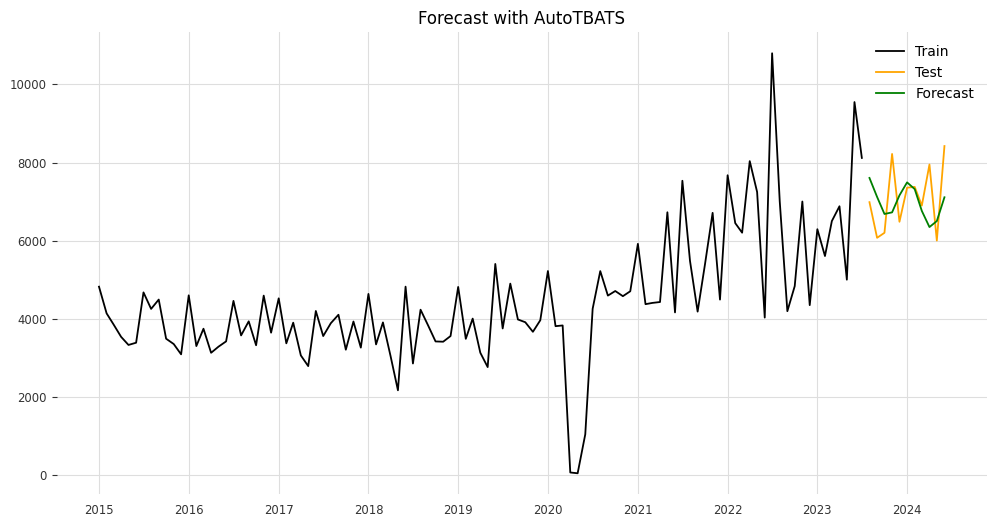

In [96]:
# Extract pandas series for plotting
train = visitor_num_d_train_series.to_series()
test = visitor_num_d_test_series.to_series()
forecast = pred.to_series()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(forecast.index, forecast, label='Forecast', color='green')

plt.title('Forecast with AutoTBATS')
plt.legend()
plt.grid(True)
plt.show()


### models for SPENDS

#### data split 

In [97]:
## SPENDS DATA
train_size = 0.8
spends_d_index = round(train_size*spend_d.shape[0])

spends_d_train = spend_d.iloc[:spends_d_index]
spends_d_test = spend_d.iloc[spends_d_index:]
spends_d_test

,Tourists Spending
Date,
2022-08-01,11232.185960
2022-09-01,5232.272873
2022-10-01,5944.044153
2022-11-01,8260.127635
2022-12-01,4508.348246
2023-01-01,8333.363581
2023-02-01,7621.117650
2023-03-01,9743.488742
2023-04-01,9428.047536


#### baseline model

In [98]:
## predict the # visitors of prevus month as the # visitors of next month
spends_d_y_pred = spends_d_test.shift(1).dropna()
spends_d_y_true = spends_d_test[1:]
spends_d_base_accuracy = mean_absolute_percentage_error(spends_d_y_true, spends_d_y_pred)
print(f"baseline model mape for spends: {spends_d_base_accuracy}")

baseline model mape for spends: 0.2770527875818471


#### AUTO TBATS >> Domestic data >> spends

In [99]:
# prepare data for AutoTBATS model

spends_d_train_series = TimeSeries.from_dataframe(spends_d_train, value_cols="Tourists Spending")
spends_d_test_series = TimeSeries.from_dataframe(spends_d_test, value_cols="Tourists Spending")

In [100]:
from darts.models import AutoTBATS
AutoTBATS = AutoTBATS(season_length=12)
AutoTBATS.fit(spends_d_train_series)
pred = AutoTBATS.predict(len(spends_d_test_series))
pred.values()

array([[12908.92729205],
       [13059.89041591],
       [12914.42760421],
       [12514.78599062],
       [11974.7572081 ],
       [11442.53480856],
       [11057.46091667],
       [10915.89775338],
       [11052.27960352],
       [11433.44208172],
       [11964.07273125],
       [12505.37430635],
       [12908.92729205],
       [13059.89041591],
       [12914.42760421],
       [12514.78599062],
       [11974.7572081 ],
       [11442.53480856],
       [11057.46091667],
       [10915.89775338],
       [11052.27960352],
       [11433.44208172],
       [11964.07273125]])

In [101]:
error = mape(spends_d_test_series, pred)
print(f"MAPE: {error:.2f}%")

## WITH DIFFERENT season_length: 
# 3 >> MAPE: 
# 6 >> MAPE: 
# 12 >> MAPE: 14.09%

MAPE: 44.74%


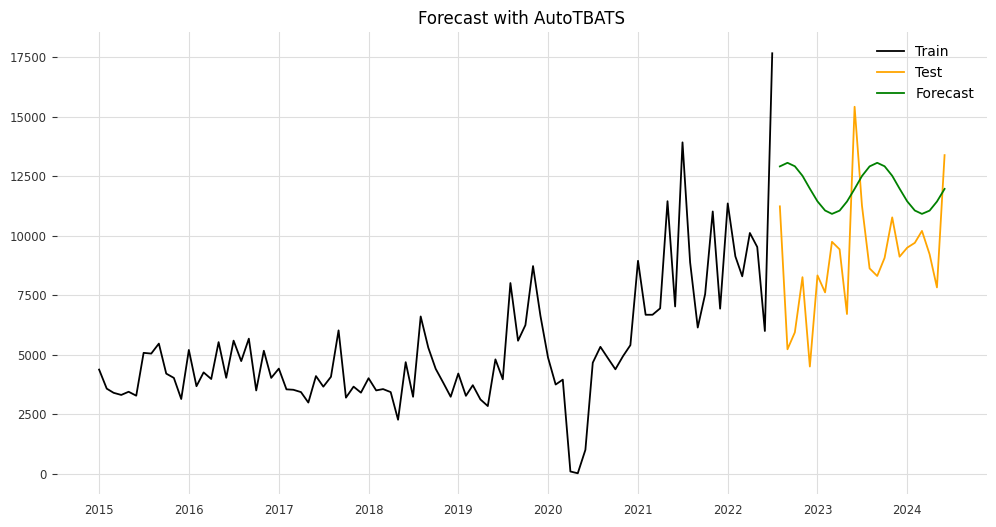

In [102]:
# Extract pandas series for plotting
train = spends_d_train_series.to_series()
test = spends_d_test_series.to_series()
forecast = pred.to_series()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(forecast.index, forecast, label='Forecast', color='green')

plt.title('Forecast with AutoTBATS')
plt.legend()
plt.grid(True)
plt.show()


## inbound data  

In [103]:
# inbound data 
## read data file
df_i = pd.read_excel('raw_data/I_data.xlsx')

## crete date column and set it as index then drop the (yeaer month) columns
df_i['Date'] = pd.to_datetime(df_i['Year'].astype(str) + ' ' + df_i['Month'])
df_i.set_index('Date', inplace=True)
df_i.drop(columns=['Year', 'Month'], inplace=True)
df_i = df_i.dropna()

## rename the column
df_i.rename(columns={'Tourists Number Overnight Visitors': 'number of visitor'}, inplace=True)
# df_i.head()

/tmp/ipykernel_3440/953207289.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_i['Date'] = pd.to_datetime(df_i['Year'].astype(str) + ' ' + df_i['Month'])


In [104]:
visitor_num_i = pd.DataFrame(df_i['number of visitor'])
spend_i = pd.DataFrame(df_i['Tourists Spending'])
# visitor_num_i

### data visualizing

### models for VISITORS NUM

#### data split

In [105]:
train_size = 0.8
visitor_num_i_index = round(train_size*visitor_num_i.shape[0])

## VISITOR DATA
visitor_num_i_train = visitor_num_i.iloc[:visitor_num_i_index]
visitor_num_i_test = visitor_num_i.iloc[visitor_num_i_index:]
visitor_num_i_test.shape

(23, 1)

#### baseline model

In [106]:
## predict the # visitors of prevus month as the # visitors of next month
visitor_num_i_y_pred = visitor_num_i_test.shift(1).dropna()
visitor_num_i_y_true = visitor_num_i_test[1:]

visitor_num_i_base_accuracy = mean_absolute_percentage_error(visitor_num_i_y_true, visitor_num_i_y_pred)
print(f"baseline model mape for visitor_num in the inbouned dataset: {visitor_num_i_base_accuracy}")

baseline model mape for visitor_num in the inbouned dataset: 0.23995167355141084


#### AUTO TBATS >> Inbouned data >> # visitors

In [107]:
# prepare data for AutoTBATS model
from darts.models import AutoTBATS

visitor_num_i_train_series = TimeSeries.from_dataframe(visitor_num_i_train, value_cols="number of visitor")
visitor_num_i_test_series = TimeSeries.from_dataframe(visitor_num_i_test, value_cols="number of visitor")

AutoTBATS = AutoTBATS(season_length=12)
AutoTBATS.fit(visitor_num_i_train_series)
pred = AutoTBATS.predict(len(visitor_num_i_test_series))
pred.values()


error = mape(visitor_num_i_test_series, pred)
print(f"MAPE: {error:.2f}%")

## WITH DIFFERENT season_length: 
# 3 >> MAPE: 
# 6 >> MAPE: 
# 12 >> MAPE: 14.54%

MAPE: 19.43%


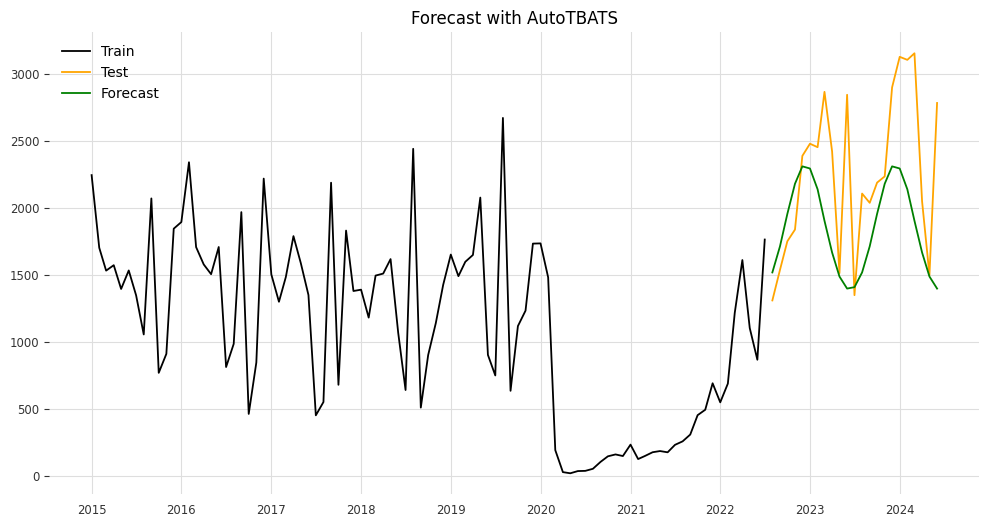

In [108]:
# Extract pandas series for plotting
train = visitor_num_i_train_series.to_series()
test = visitor_num_i_test_series.to_series()
forecast = pred.to_series()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(forecast.index, forecast, label='Forecast', color='green')

plt.title('Forecast with AutoTBATS')
plt.legend()
plt.grid(True)
plt.show()


### models for SPENDS

#### data split

In [109]:
## SPENDS DATA
train_size = 0.8
spends_i_index = round(train_size*spend_i.shape[0])

spends_i_train = spend_i.iloc[:spends_i_index]
spends_i_test = spend_i.iloc[spends_i_index:]

#### baseline model

In [110]:
## predict the # visitors of prevus month as the # visitors of next month
spends_i_y_pred = spends_i_test.shift(1).dropna()
spends_i_y_true = spends_i_test[1:]
spends_i_base_accuracy = mean_absolute_percentage_error(spends_i_y_true, spends_i_y_pred)
print(f"baseline model mape for spends in the inbouned data: {spends_i_base_accuracy}")

baseline model mape for spends in the inbouned data: 0.47135224897632405


#### AUTO TBATS >> Inbouned data >> spends

In [111]:
# prepare data for AutoTBATS model
from darts.models import AutoTBATS

spends_i_train_series = TimeSeries.from_dataframe(spends_i_train, value_cols="Tourists Spending")
spends_i_test_series = TimeSeries.from_dataframe(spends_i_test, value_cols="Tourists Spending")

AutoTBATS = AutoTBATS(season_length=12)
AutoTBATS.fit(spends_i_train_series)
pred = AutoTBATS.predict(len(spends_i_test_series))
pred.values()


error = mape(spends_i_test_series, pred)
print(f"MAPE: {error:.2f}%")

## WITH DIFFERENT season_length: 
# 3 >> MAPE: 
# 6 >> MAPE: 25.20%
# 12 >> MAPE: 27.55%

MAPE: 31.26%


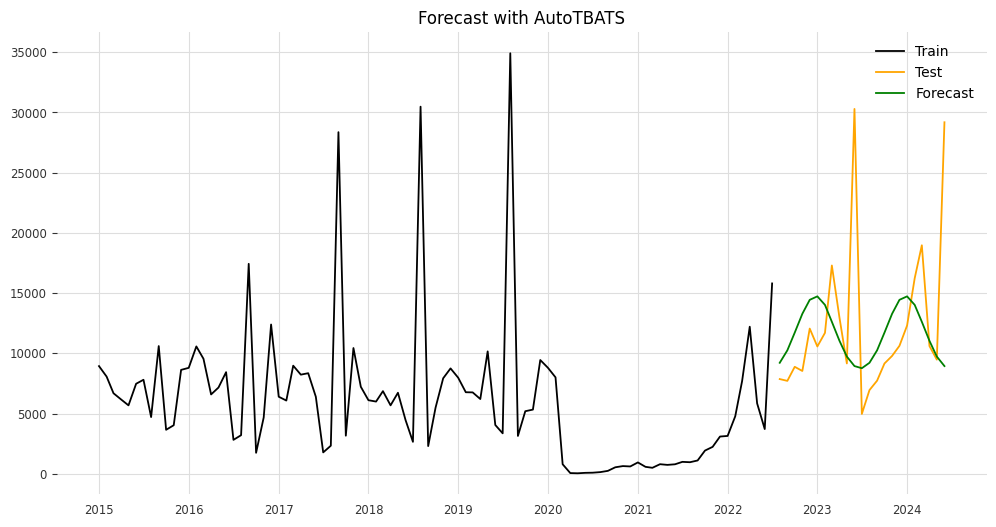

In [112]:
# Extract pandas series for plotting
train = spends_i_train_series.to_series()
test = spends_i_test_series.to_series()
forecast = pred.to_series()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(forecast.index, forecast, label='Forecast', color='green')

plt.title('Forecast with AutoTBATS')
plt.legend()
plt.grid(True)
plt.show()
